In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from qsense.io import IO

In [27]:
io = IO(folder=r"2023-01-12_cfi-batch-optimization_4dea")
df = io.load_dataframe(filename="cfi-batch")
df

12/01/2023, 15:38:57 | Loaded from C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2023-01-12_cfi-batch-optimization_4dea\cfi-batch.pkl successfully.


,n,d,run,lr,n_steps,losses,qfi
0,2,2,0,0.15,300,"[0.016639408, 0.02376568, 0.0353505, 0.0549538...",3.9999998
1,2,2,1,0.15,300,"[0.20187248, 0.51149493, 1.0530263, 1.7908274,...",4.0
2,2,2,2,0.15,300,"[1.286502, 1.5378975, 2.001949, 2.4221709, 2.7...",4.0
3,4,2,0,0.15,300,"[0.9644564, 1.4984868, 2.1163447, 2.688824, 3....",16.0
4,4,2,1,0.15,300,"[0.976353, 1.6689389, 2.613365, 3.6740143, 4.6...",15.999973
5,4,2,2,0.15,300,"[0.94398105, 1.1903367, 1.3159962, 1.3744253, ...",15.999999
6,6,2,0,0.15,300,"[0.5549505, 1.3823127, 1.92468, 2.67818, 3.913...",36.0
7,6,2,1,0.15,300,"[1.8014598, 1.9800549, 2.1579323, 2.3056874, 2...",5.00023
8,6,2,2,0.15,300,"[0.551759, 1.0025004, 1.4116788, 1.6866564, 1....",35.98955
9,8,2,0,0.15,300,"[1.0896525, 1.6394293, 2.196309, 2.7567492, 3....",7.0


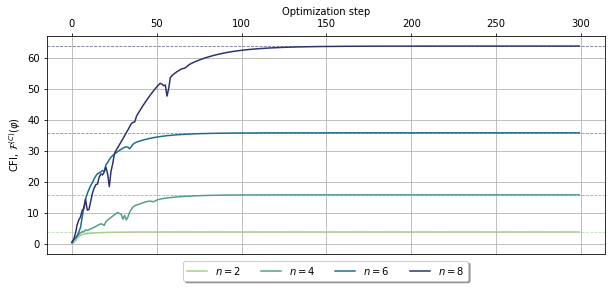

In [28]:
fig, ax = plt.subplots(1, 1, figsize=[10, 4])
colors = lambda x: sns.color_palette("crest", as_cmap=True)((x - 2) / (8 - 2))

d = 2
df["qfi"] = df["qfi"].astype('float64')

for i, n in enumerate(df.n.unique()):
    dfi = df[(df.d == d) & (df.n == n)]

    losses = dfi.loc[dfi['qfi'].idxmax()].losses
    ax.plot(losses, label=f"$n={n}$", **dict(color=colors(n), ls='-', lw=1.5, alpha=1.0, ))
    ax.axhline(n ** 2, **dict(color=colors(n), alpha=0.7, ls="--", lw=0.8))

ax.grid(None)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position("top")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01),
          fancybox=True, shadow=True, ncol=4)

ax.set(xlabel="Optimization step")
ax.set(ylabel=r'CFI, $\mathcal{F}^{(C)}(\varphi)$')
plt.show()

In [29]:
io.save_figure(fig, filename="cfi_co-optimized_qubits")

12/01/2023, 15:39:03 | Saved figure to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2023-01-12_cfi-batch-optimization_4dea\cfi_co-optimized_qubits successfully.
